In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Case Study


Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [ ]:
#The target column is total_claim_amount

    Customer - Customer ID
    ST - State where customers live
    Gender - Gender of the customer
    Education - Background education of customers
    
    Customer Lifetime Value - Customer lifetime value(CLV) is the predicted or calculated value (net profit) of a customer over their entire duration as a policyholder with the insurance company. (influenced by factors such as the duration pf policy, premium payments, claim history, renewal likelihood...)
    
    Income - Customers income
    Monthly Premium Auto - customer pays a monthly basis as a premium for their auto insurance coverage. 
    Number of Open Complaints
    Policy Type (Corporate Auto, Personal Auto, and Special Auto)
    Vehicle Class -  Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car
    
    Total Claim Amount - total monetary value of all approved claims for incidents 

## Get data

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head(4)

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize


In [ ]:
#data.info

## Cleaning/Wrangling/EDA

In [3]:
data.isnull().sum() #we do not have null values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
#Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
import re
data.columns = [re.sub(r'(?<=[a-z])(?=[A-Z])', '_', col).lower().replace(' ', '_') for col in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [ ]:
#Change "effective to date" column to datetime format.

In [9]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data['effective_to_date'].min()

Timestamp('2011-01-01 00:00:00')

In [26]:
# Categorical dataframe called categorical_df. 
categorical_df = data.select_dtypes(include=['object'])
categorical_df.isnull().sum() #we do not have null values

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [32]:
#categorical_df.dtypes
for col in categorical_df.columns:
    display(categorical_df[col].value_counts())
#Does any column contain alpha and numeric data? Decide how to clean it and do it
    #customer id contains both => can be dropped
    #Renew Offer Type => can turn to numeric / discrete (removing "offer")
    #policy contains policy type + 'L'+number => we replace to keep only the L

customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

response
No     7826
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

employment_status
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4658
M    4476
Name: count, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

renew_offer_type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: count, dtype: int64

sales_channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: count, dtype: int64

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

vehicle_size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64

In [33]:
categorical_df['policy'] = categorical_df['policy'].str[-2:]
categorical_df['policy'].value_counts()

policy
L3    4588
L2    2881
L1    1665
Name: count, dtype: int64

In [10]:
#  Numerical dataframe called numerical_df. 
numerical_df = data.select_dtypes(np.number)
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

## Processing Data

In [17]:
#Define a function that differentiates between continuous and discrete variables. 
#Store continuous data into a continuous_df variable and do the same for discrete_df
    #The number of unique values might be useful. 

#lots of unique values = continuous
def continuous_or_discrete(df):
    continuous_vars = []
    discrete_vars = []

    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values > 10:  
            continuous_vars.append(col)
        else:
            discrete_vars.append(col)

    continuous_df = df[continuous_vars]
    discrete_df = df[discrete_vars]

    return continuous_df, discrete_df
    #print (continuous_df.head(5)) 
    #print (discrete_df.head(5))

#cut off to 10 because the effectivedate doesnt show up in the list of numerical columns
resultdf=continuous_or_discrete(numerical_df)
#resultdf=continuous_or_discrete(numerical_df)

(      customer_lifetime_value  income  monthly_premium_auto  \
 0                 2763.519279   56274                    69   
 1                 6979.535903       0                    94   
 2                12887.431650   48767                   108   
 3                 7645.861827       0                   106   
 4                 2813.692575   43836                    73   
 ...                       ...     ...                   ...   
 9129             23405.987980   71941                    73   
 9130              3096.511217   21604                    79   
 9131              8163.890428       0                    85   
 9132              7524.442436   21941                    96   
 9133              2611.836866       0                    77   
 
       months_since_last_claim  months_since_policy_inception  \
 0                          32                              5   
 1                          13                             42   
 2                          18     

In [ ]:
#Create a function to plot every discrete variable. 
#Do the same with the continuous variables 
#(Be Careful, you may need to change the plot type to one better suited for continuous data!)

/var/folders/lh/fxd814lj4c94_w7c1zg3sc7r0000gp/T/ipykernel_50055/1014651320.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_integer_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):


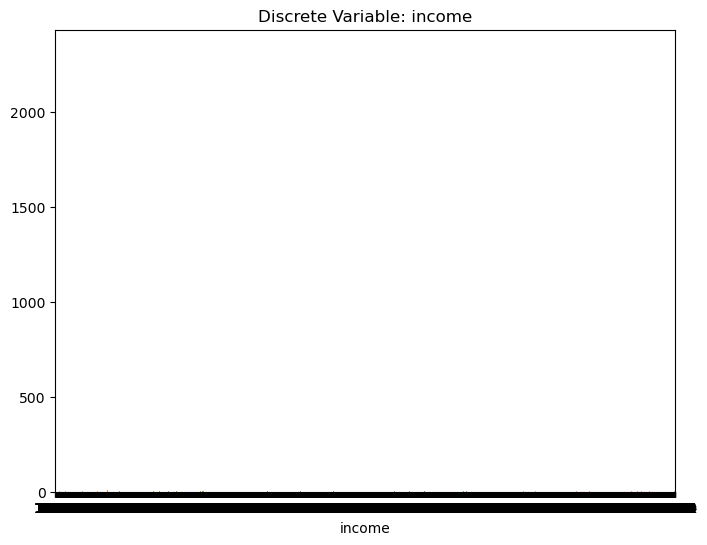

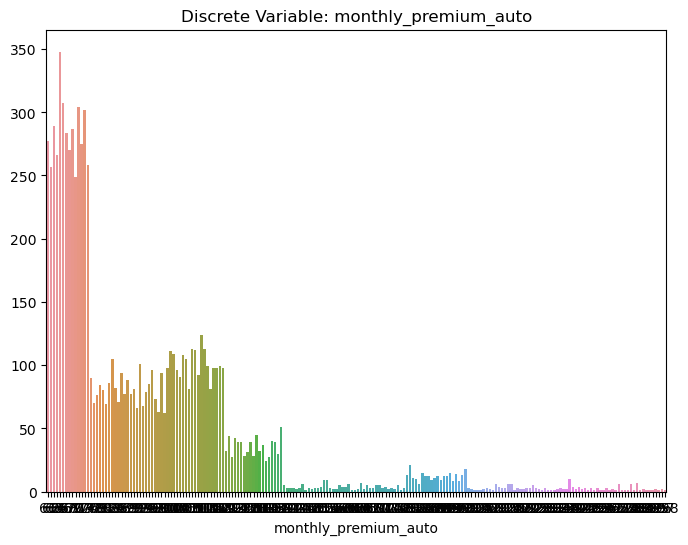

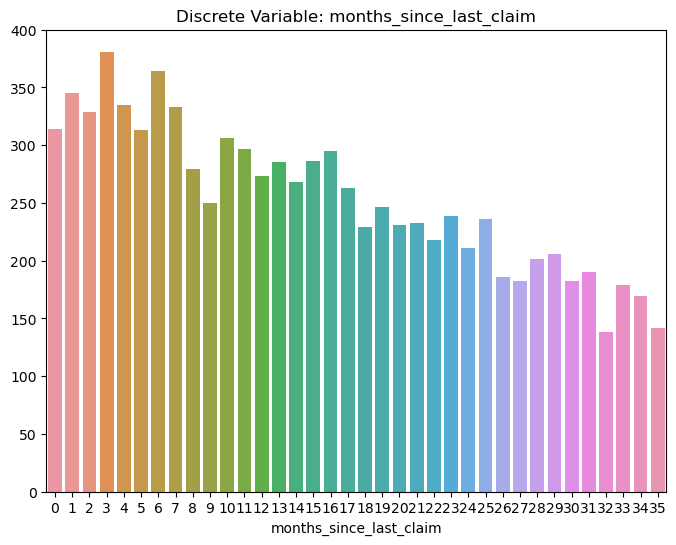

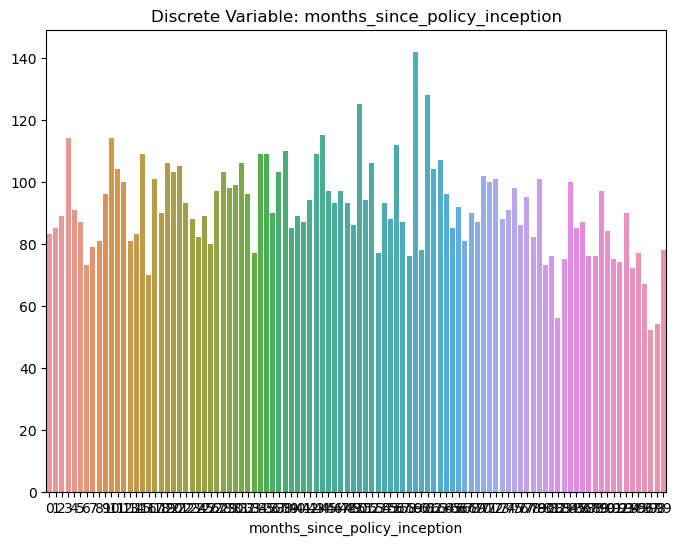

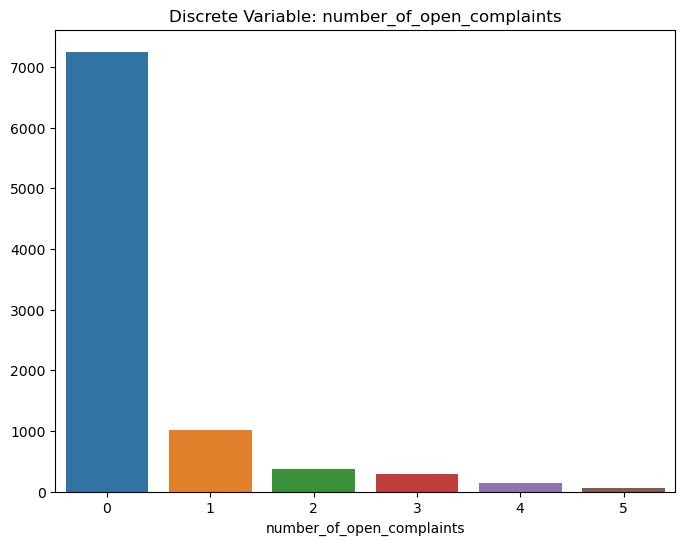

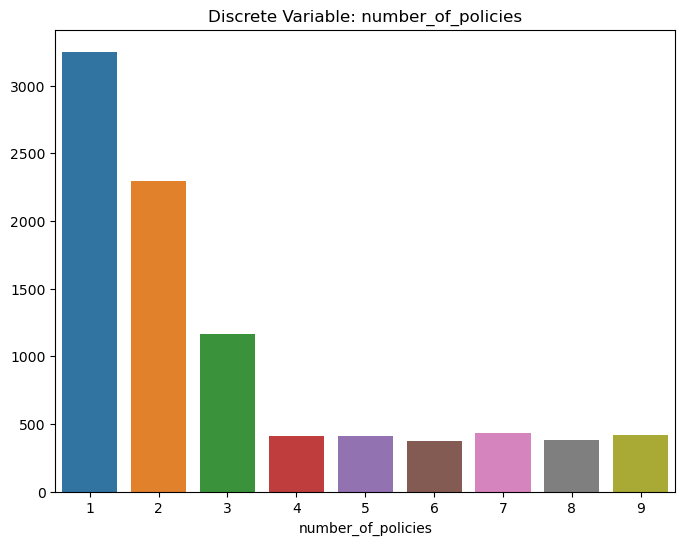

/var/folders/lh/fxd814lj4c94_w7c1zg3sc7r0000gp/T/ipykernel_50055/1014651320.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_integer_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):


In [18]:
def plot_discrete_variables(df):
    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Check if the column contains discrete data
        if pd.api.types.is_integer_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):
            # Count the frequency of each value in the column
            value_counts = df[col].value_counts().sort_index()
#if continuous data: histogram
#if discrete: countplot/barplot
            
            # Plot the bar chart
            plt.figure(figsize=(8, 6))
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.title(f'Discrete Variable: {col}')
            plt.show()

plot_discrete_variables(numerical_df)

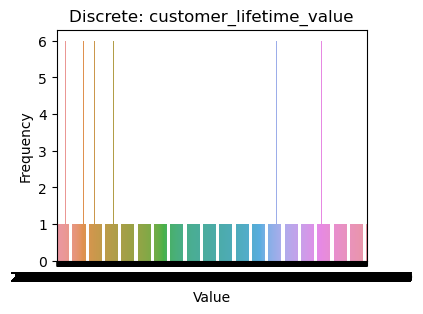

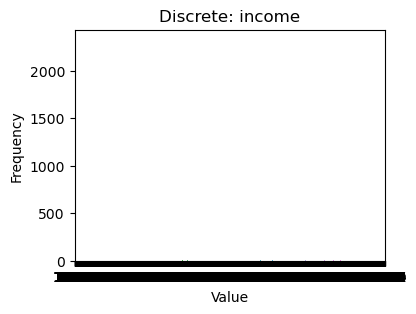

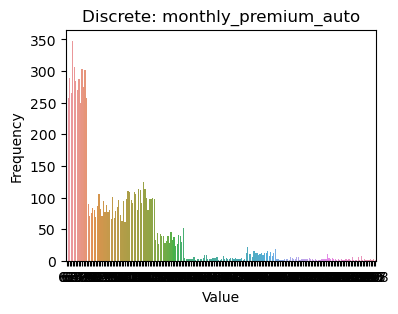

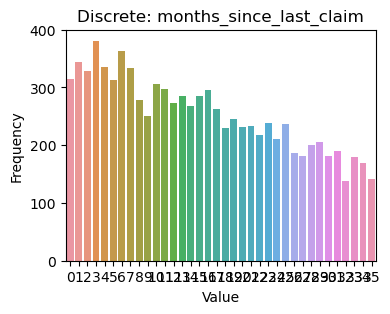

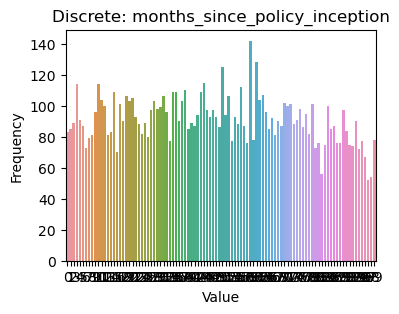

/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


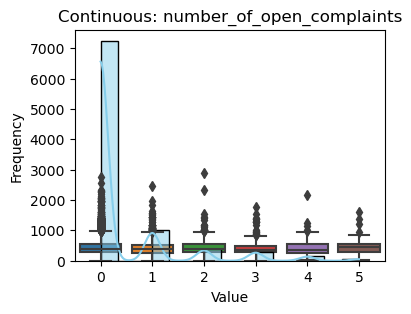

/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


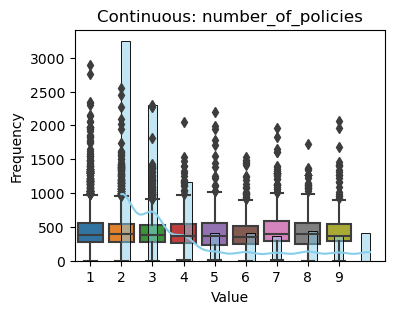

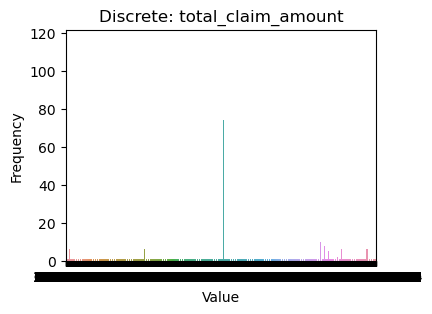

In [24]:
def plot_discrete_and_continuous(df,target):
    continuous_vars = []
    discrete_vars = []
    for col in df.columns:
        unique_values = df[col].nunique()
        unique_percentage = unique_values / len(df[col])
        if unique_values > 10: #unique_percentage <= 0.2: 
            discrete_vars.append(col)
                   # Plot the bar chart
            value_counts = df[col].value_counts().sort_index()
            plt.figure(figsize=(4, 3))
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.title(f'Discrete: {col}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.show()
        else:
            continuous_vars.append(col)
            value_counts = df[col].value_counts().sort_index()
            plt.figure(figsize=(4, 3))
            sns.boxplot(x=col, y=target, data=df)
            sns.histplot(data=df, x=col, kde=True, color='skyblue')
            plt.title(f'Continuous: {col}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.show()

    #return continuous_vars, discrete_vars
plot_discrete_and_continuous(numerical_df,numerical_df.total_claim_amount)

In [ ]:
#Look for outliers in the continuous variables. (boxplot)
    #did you find outliers? If you decide to remove them, do that now and remove them from your main dataframe.. 
#Outliers:
#



In [ ]:
#Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
    #we do not have NaNs


In [ ]:
#Save the numerical_df to csv as numerical.csv 
numerical_df.to_csv('numerical.csv', index=False)  # Setting index=False prevents writing row indices to the CSV file

## Modeling -Validation

In [ ]:
#Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [ ]:
numericals['INCOME'].fillna(data['INCOME'].mean()).hist(bins=7)#filling with a mean makes a spike at 4; 
#filling with mode (5) or median also makes a spike ignoring the rest of the values

In [ ]:
numericals.shape

In [ ]:
# instead we are going to use all other columns to "predict" income

In [ ]:
numericals_with_income = numericals[numericals['INCOME'].notna()] #our prediction model is based on almost all numerical columns
numericals_with_income.shape

In [ ]:
numericals_with_income.head()

In [ ]:
X_income = numericals_with_income.drop(['INCOME','TIMELAG','AVGGIFT'],axis=1) 
#we treat the rows where we do have a value as our training set
y_income = numericals_with_income['INCOME']

In [ ]:
X_income.head()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
#"kneighbors" will associate a point to a group of points depending on the distance
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_normalized_income = pd.DataFrame(MinMaxScaler().fit_transform(X_income), columns=X_income.columns)
X_normalized_income

In [ ]:
display(X_normalized_income.shape)
display(y_income.shape)

In [ ]:
#if KNN score puts flags error, you need to !pip install scikit-learn==1.2.2
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_normalized_income,y_income)
KNN.score(X_normalized_income,y_income)
#KMN score is an accuracy score. It is here 52%; randomly we would have 1 out of 7 choices for income = 14%. 
#So 52% is better than (mean or mode filling)

In [ ]:
## now on to predict the INCOME from the other features

In [ ]:
numericals.shape

In [ ]:
X_all = numericals.drop(['INCOME','TIMELAG','AVGGIFT'],axis=1)
X_normalized_all = pd.DataFrame(MinMaxScaler().fit_transform(X_all), columns=X_all.columns)
y_all = numericals['INCOME']

In [ ]:
predicted_income = pd.Series(KNN.predict(X_normalized_all),name='predicted_income')

In [ ]:
predicted_income.value_counts(dropna=False)
#in this we made predictions even for those where we had data already

In [ ]:
numericals['INCOME'].value_counts(dropna=False) #comparing real data (below with nan) to predicted data
#it is skewed more to the lower end

In [ ]:
len(predicted_income)

In [ ]:
len(data)

In [ ]:
data = pd.concat([data,predicted_income],axis=1)


In [ ]:
data[['INCOME','predicted_income']].head(25)

In [ ]:
data.INCOME.mean()

In [ ]:
data.predicted_income.mean()

In [ ]:
data['final_income'] =  np.where(data['INCOME'].isna(), data['predicted_income'], data['INCOME'])
data[['INCOME','predicted_income','final_income']].head(25)

In [ ]:
data['final_income'].mean()

In [ ]:
#now with same distribution as before!
data['INCOME'].hist(bins=7)

In [ ]:
data['final_income'].hist(bins=7)

In [ ]:
display(data['final_income'].mean())
display(data['INCOME'].mean())

In [ ]:
data.final_income.value_counts(dropna=False)

In [ ]:
data.drop(['INCOME','predicted_income'],axis=1,inplace=True)
data.head()

In [ ]:
len(data)

## Modeling -Validation

In [ ]:
#ooof ... HEAVYYYYYY skew
data['TIMELAG'].hist(bins=100)
plt.show()

sns.boxplot(y=data['TIMELAG'])
plt.show()

In [ ]:
def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [ ]:
pd.Series(data['TIMELAG'].apply(log_transfom_clean)).hist()
plt.show()

In [ ]:
data['TIMELAG'].median()

In [ ]:
#we can log transform it
#data[data.TIMELAG==0.0][‘NGIFTALL’].value_counts()
#we cant work with a null so we have to put in a numerical value: 0. after reflection 0 is actually the best value

In [ ]:
data['TIMELAG_transformed'] = data['TIMELAG'].apply(log_transfom_clean)
data['TIMELAG_transformed'] = data['TIMELAG_transformed'].fillna(np.mean(data['TIMELAG_transformed']))
data['TIMELAG_transformed'].hist()
plt.show()

In [ ]:
data['TIMELAG_transformed'].mean()
#np.e**data['TIMELAG_transformed'].mean()




In [ ]:
# WORD OF WARNING ON ACTIVITY 3
# just like with boxplots, logarithmic transforms and scales are not for the final USER
# if you have a quantity that you need to express that would require a log transform you're better off binning the data

In [ ]:
data['TIMELAG_transformed'].value_counts(dropna=False)


In [ ]:
np.nanpercentile(data['TIMELAG'],75) 
#np.percentile(data['TIMELAG'],50) would give nan
#nanpercentile is for when you need 50th percentile but ignoring nan?

In [ ]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(data['TIMELAG'],75) - np.nanpercentile(data['TIMELAG'],25)
upper_limit = np.nanpercentile(data['TIMELAG'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = data[data['TIMELAG'] >200] #>250
len(extraordinary_points)  # This checks the number of points that will be removed

In [ ]:
# If we wanted to drop the rows that are above upper_limit
#if we assume those are error of entry, we want to replace them with NaN
data_timelagNaN_dropped = data[data['TIMELAG'] <= upper_limit].copy() #upper limit =250
# however, using <= also removes the rows for which TIMELAG is NaN, se we would need to fillna first.

In [ ]:
len(data_timelagNaN_dropped)

In [ ]:
##alternative way Feb 2024##
#either this or fill with 0
data.TIMELAG=np.where(data.TIMELAG>250, np.NaN, data.TIMELAG)
data['TIMELAG'].hist(bins=100)
plt.show()

In [ ]:
len(data_timelagNaN_dropped)

In [ ]:
data['TIMELAG_transformed'].hist()

In [ ]:
data['TIMELAG_transformed'].hist()

## Reporting

In [ ]:
#data.to_csv('HC4A_unit4_ver0.csv', index=False)